In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%bash
cat './data/Online Retail.csv' | head

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850,United Kingdom


In [3]:
_path = './data/Online Retail.csv'


In [4]:
df = pd.read_csv(_path, delimiter=',')
print(df.shape)
print(df.info())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
len(df['CustomerID'].unique())

4373

In [10]:
df.loc[:,('CustomerID')].fillna(0, inplace =True)
df.loc[:,('Description')].fillna('Unknown', inplace =True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [17]:
df.drop(columns =['InvoiceNo','StockCode'], inplace =True)

In [18]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Text(0.5, 1.0, 'Count plot of countries in dataset')

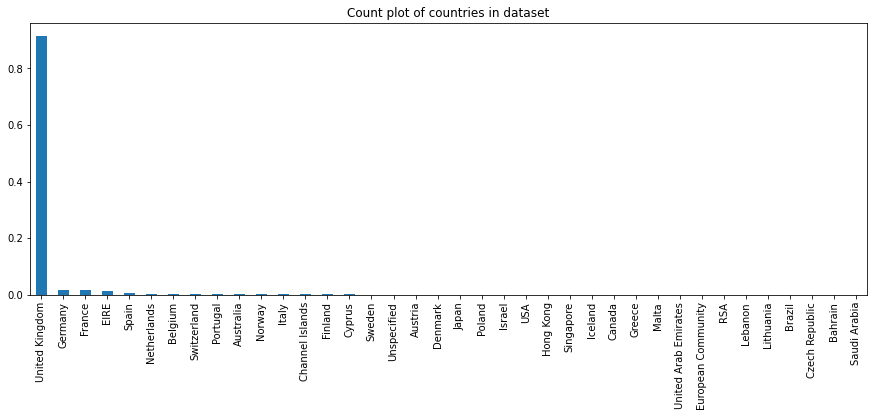

In [28]:
df['Country'].value_counts(normalize=True).plot(kind='bar', figsize=(15, 5))
plt.title('Count plot of countries in dataset')

In [29]:
df_UK = df.loc[df['Country'].isin(['United Kingdom']),:]

In [30]:
df_UK.shape

(495478, 6)

In [32]:
len(df_UK['Quantity'].unique())

715

In [34]:
df_UK.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,495478.000000
mean,8.605486,4.532422,11355.564919
std,227.588756,99.315438,7032.977233
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.100000,14532.000000
75%,10.000000,4.130000,16445.000000
max,80995.000000,38970.000000,18287.000000


In [39]:
df_UK = df_UK[df_UK['Quantity'] >0]

In [41]:
df_UK.describe()

,Quantity,UnitPrice,CustomerID
count,486286.000000,486286.000000,486286.000000
mean,9.734640,3.794976,11332.689018
std,163.262428,41.271159,7047.970975
min,1.000000,-11062.060000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.100000,14529.000000
75%,10.000000,4.130000,16451.000000
max,80995.000000,13541.330000,18287.000000


In [42]:
df_UK = df_UK[df_UK['UnitPrice'] >=0]

In [43]:
df_UK.describe()

,Quantity,UnitPrice,CustomerID
count,486284.000000,486284.000000,486284.000000
mean,9.734676,3.840488,11332.735628
std,163.262763,34.636460,7047.947996
min,1.000000,0.000000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.100000,14529.000000
75%,10.000000,4.130000,16451.000000
max,80995.000000,13541.330000,18287.000000


In [68]:
print(-np.sort(-df_UK['Quantity'].unique())[:5])
print(-np.sort(-df_UK['UnitPrice'].unique())[:5])

[80995 74215 12540  5568  4800]
[13541.33 11062.06  8142.75  4505.17  4287.63]


In [69]:
df_UK.loc[df_UK['Quantity'].isin([80995,74215,12540 ,5568 ,4800]),: ]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom
74614,Unknown,5568,1/28/11 12:03,0.00,0.0,United Kingdom
421632,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/11 12:26,0.21,12901.0,United Kingdom
502122,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/11 15:57,0.00,13256.0,United Kingdom
540421,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom


In [71]:
hp_items = -np.sort(-df_UK['UnitPrice'].unique())[:15]
df_UK.loc[df_UK['UnitPrice'].isin(hp_items)]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,AMAZON FEE,1,12/7/10 15:08,13541.33,0.0,United Kingdom
150615,Manual,1,4/8/11 14:27,1867.86,17940.0,United Kingdom
173382,POSTAGE,1,5/3/11 13:46,8142.75,16029.0,United Kingdom
268028,Manual,1,7/18/11 12:30,4287.63,0.0,United Kingdom
297438,Manual,1,8/11/11 9:38,2500.00,15581.0,United Kingdom
297723,DOTCOM POSTAGE,1,8/11/11 10:14,4505.17,0.0,United Kingdom
299982,Adjust bad debt,1,8/12/11 14:50,11062.06,0.0,United Kingdom
343000,Manual,1,9/15/11 15:20,2033.10,17846.0,United Kingdom
374542,Manual,1,10/3/11 16:44,3155.95,15502.0,United Kingdom
431348,DOTCOM POSTAGE,1,10/31/11 14:41,2019.05,0.0,United Kingdom


In [85]:
search_values = ['postage','manual','dept','fee']
patt = '|'.join(search_values)
not_items_df = df_UK['Description'].apply(lambda x: x.lower() in(patt))

In [89]:
patt

'postage|manual|dept|fee'

In [87]:
df_UK_items = df_UK[not_items_df]

In [88]:
df_UK_items

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,Manual,1,12/1/10 15:35,1.25,16274.0,United Kingdom
2250,Manual,1,12/1/10 15:35,18.95,16274.0,United Kingdom
5684,Manual,1,12/3/10 11:28,2.55,0.0,United Kingdom
6798,Manual,2,12/3/10 14:26,0.85,14723.0,United Kingdom
7976,Manual,12,12/5/10 11:59,0.42,17062.0,United Kingdom
...,...,...,...,...,...,...
526018,Manual,800,12/5/11 13:13,0.25,17857.0,United Kingdom
530876,Manual,1,12/6/11 12:21,0.85,15907.0,United Kingdom
531432,Manual,4,12/6/11 14:23,1.25,17841.0,United Kingdom
531880,POSTAGE,1,12/6/11 15:29,5.29,0.0,United Kingdom
